# データ変換の適用

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=1
)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
result=scaler.fit(X_train) # 教師無し学習なので正解データは渡さない
print("result:", result)
X_train_scaled = scaler.transform(X_train)
print("transformed shape:", X_train_scaled.shape)
print("per-feature minimum before scaling:\n", X_train.min(axis=0))
print("per-feature maximum before scaling:\n", X_train.max(axis=0))
print("per-feature minimum after scaling:\n", X_train_scaled.min(axis=0))
print("per-feature maximum after scaling:\n", X_train_scaled.max(axis=0))

result: MinMaxScaler()
transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 1.038e+01 4.379e+01 1.435e+02 5.263e-02 2.650e-02 0.000e+00
 0.000e+00 1.167e-01 5.025e-02 1.144e-01 3.602e-01 7.570e-01 6.802e+00
 2.667e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 9.502e-04 7.930e+00
 1.249e+01 5.041e+01 1.852e+02 8.409e-02 4.327e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.264e-01
 1.913e-01 2.906e-01 9.575e-02 2.873e+00 3.647e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 5.774e-01 2.075e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [6]:
# テストデータを変換
X_test_scaled = scaler.transform(X_test)
print("per-feature minimum after scaling (test set):\n", X_test_scaled.min(axis=0))
print("per-feature maximum after scaling (test set):\n", X_test_scaled.max(axis=0))

per-feature minimum after scaling (test set):
 [ 0.07648256 -0.02318339  0.07117684  0.03295864  0.08919383 -0.02232675
  0.          0.         -0.06152961 -0.00637363 -0.00105126  0.00079104
  0.00067851  0.00079567 -0.0335172  -0.01134793  0.          0.
  0.0233157  -0.00191763  0.03635717 -0.01268556  0.03107724  0.01349292
 -0.09327846 -0.01574803  0.          0.          0.00023759  0.01252788]
per-feature maximum after scaling (test set):
 [0.8173127  0.76435986 0.84589869 0.68610817 0.83118173 0.89338351
 1.00093809 1.05175118 1.07705578 1.03714286 0.50554629 1.37665815
 0.44117231 0.4224857  0.72596002 0.77972564 0.38762626 0.66054177
 0.75389768 0.75839224 0.80896478 0.88852901 0.75696001 0.66869839
 0.9075879  0.81108275 0.61717252 0.88487973 1.20527441 0.77371114]


## 訓練データとテストデータを同じように変換する

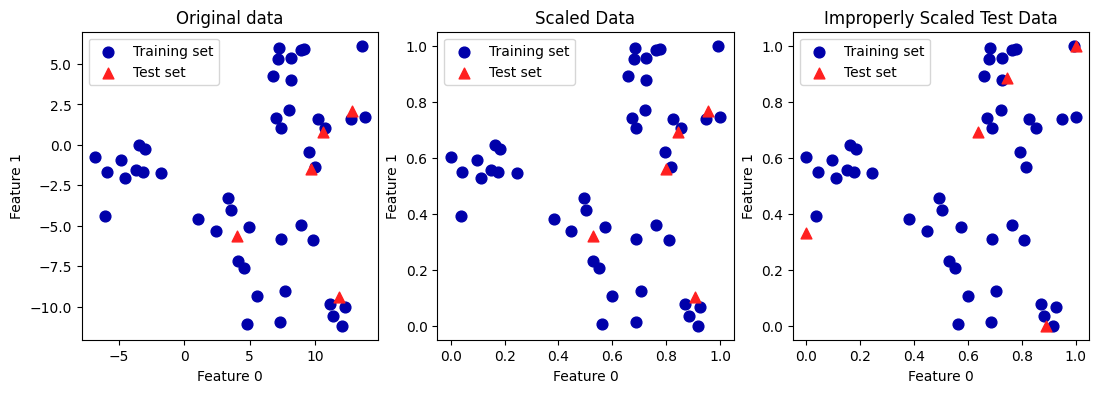

In [12]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import mglearn

# 碁聖データを作成
X, _ = make_blobs(n_samples=50, centers=5, cluster_std=2, random_state=4)
# 訓練セットとデータセットに分割
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1], color=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], color=mglearn.cm2(1), label="Test set", marker="^", s=60)
axes[0].legend(loc="upper left")
axes[0].set_title("Original data")

# MinMaxScalerでスケール変換
scaler = MinMaxScaler()
scaler.fit(X_train)  # 訓練データで学習
X_train_scaled = scaler.transform(X_train)  # 訓練データを変換
X_test_scaled = scaler.transform(X_test)    # テストデータを変換

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker="^", color=mglearn.cm2(1), label="Test set", s=60)
axes[1].legend(loc="upper left")
axes[1].set_title("Scaled Data")

# テストセットを訓練セットと別にスケールしてみる
# わざとやってるが、実際にはやってはいけない
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)  # テストデータで学習
X_test_scaled_badly = test_scaler.transform(X_test)  # テストデータ

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color=mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker="^", color=mglearn.cm2(1), label="Test set", s=60)
axes[2].legend(loc="upper left")
axes[2].set_title("Improperly Scaled Test Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
